## Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd, numpy as np, os, matplotlib.pyplot as grpvisl,matplotlib as mcm,seaborn as grpvz, math

from IPython.display import display, HTML

from sklearn import naive_bayes, tree, svm, neighbors, ensemble, linear_model,metrics
from sklearn import model_selection, preprocessing, pipeline, utils,decomposition,feature_selection

## Data Reading

In [2]:
def LoadAlzheimer():   
    alz=pd.read_csv("alzheimer.csv")
    print("Instances in Data is {}\nFeatures in Data {}".format(alz.shape[0],alz.shape[1]))
    display(HTML(alz.head().to_html()))
    return alz

In [3]:
ALZM=LoadAlzheimer()

Instances in Data is 373
Features in Data 10


,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


## Data Information

In [4]:
def AlzheimerDetails(alz):
    print("Details of Feature\n")
    print(alz.info())
    print("Statistics of Feature\n")
    display(HTML(alz.describe().to_html()))
    print("Missing Values\n")
    print(alz.isnull().sum())

In [5]:
AlzheimerDetails(ALZM)

Details of Feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    object 
 1   M/F     373 non-null    object 
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     354 non-null    float64
 5   MMSE    371 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 29.3+ KB
None
Statistics of Feature



,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


Missing Values

Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64


## Removal of Missing Data

In [6]:
def TreatMissing(alz):
    msalz=sum(alz.isnull().sum())
    print("==============================================")
    print("Total Missing Values Before Cleaning: {}".format(msalz))
    alct=alz.dtypes[alz.dtypes=='object'].index.tolist()
    alnm=alz.dtypes[alz.dtypes!='object'].index.tolist()
    for ac in alct:
        alz[ac]=alz[ac].fillna(alz[ac].mode()[0])
    for an in alnm:
        alz[an]=alz[an].fillna(alz[an].mean())
    msalzaft=sum(alz.isnull().sum())
    print("----------------------------------------------")
    print("Total Missing Values After Cleaning: {}".format(msalzaft))
    print("==============================================")
    display(HTML(alz.head().to_html()))
    return alz

In [7]:
ALZM_MT=TreatMissing(ALZM)

Total Missing Values Before Cleaning: 21
----------------------------------------------
Total Missing Values After Cleaning: 0


,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,2.460452,22.0,0.5,1698,0.701,1.034


## Target Encoding

In [8]:
def AlzheimerFetureEncode(alz):
    alz1=alz.copy()
    alct=alz1.dtypes[alz.dtypes=='object'].index.tolist()[1:]
    for ac in alct:
        alz1[ac]=alz1[ac].replace(alz1[ac].unique(),[x for x in range(len(alz1[ac].unique()))])
    display(HTML(alz1.head().to_html()))
    print("Informatiuon of Features after Target Transformation\n")
    print(alz1.info())
    return alz1

In [9]:
ALZM_FEC=AlzheimerFetureEncode(ALZM_MT)

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,0,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,Nondemented,0,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,Demented,0,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,Demented,0,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,Demented,0,80,12,2.460452,22.0,0.5,1698,0.701,1.034


Informatiuon of Features after Target Transformation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    object 
 1   M/F     373 non-null    int64  
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     373 non-null    float64
 5   MMSE    373 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int64(4), object(1)
memory usage: 29.3+ KB
None


## Outlier Detection and Removal

In [10]:
def BoxForAlzheimer(alz,spl):
    alz.plot(kind='box',figsize=(8,4))
    grpvisl.title("Detection of Outliers Through Boxplot({})".format(spl),fontsize=17,color="b")
    grpvisl.xlabel("Features",fontsize=15,color="b")
    grpvisl.xticks(rotation=90)
    grpvisl.ylabel("Value",fontsize=  15,color="b")
    grpvisl.grid()
    grpvisl.show()

In [11]:
def AlzheimerOD(alz,n,w,h,col,lc):
    alz_array=np.array(alz.iloc[:,:-1])
    alz_pca_md = decomposition.PCA(n_components=n)
    alz_pca_md.fit(alz_array)
    alzexvar=alz_pca_md.explained_variance_ratio_
    print(alz_pca_md.explained_variance_ratio_)
    alz_pc_cm=["Cm-{}".format(i+1) for i in range(len(alz_pca_md.explained_variance_ratio_.tolist()))]
    grpvisl.figure(figsize=(w,h))
    grpvisl.title("Variance of Component for {}-PCA\nVarience(Max): {}".format(n, round(max(list(alz_pca_md.explained_variance_ratio_)),3)),fontsize=18)
    grpvisl.bar(alz_pc_cm,alz_pca_md.explained_variance_ratio_.tolist(),width=0.5,color=col)
    grpvisl.plot(alz_pca_md.explained_variance_ratio_.tolist(),"--H")
    grpvisl.plot(alz_pca_md.explained_variance_ratio_.tolist(),"--{}".format(lc))
    grpvisl.xlabel("Components",fontsize=14)
    grpvisl.ylabel("Variance",fontsize=14)
    grpvisl.grid()
    grpvisl.show()
    return alzexvar

In [12]:
def AlzheimerNorm(alz):
    mm_mdl = preprocessing.MinMaxScaler()
    nrm_alz=mm_mdl.fit_transform(alz)
    return nrm_alz

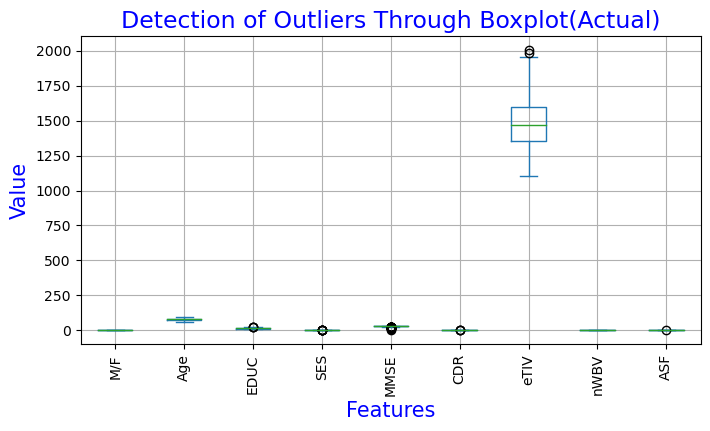

In [13]:
BoxForAlzheimer(ALZM_FEC.drop('Group',axis=1),"Actual")

[0.9973982  0.00187584]


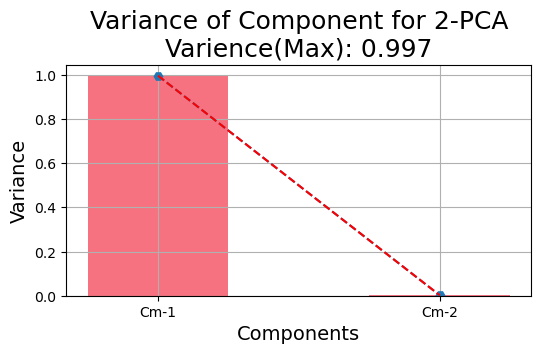

[9.97398198e-01 1.87583648e-03 4.61047104e-04 2.39585101e-04]


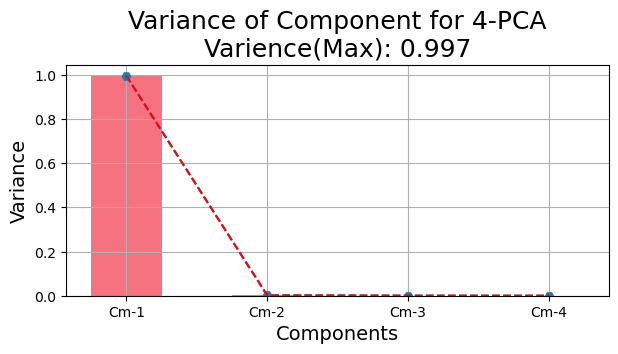

[9.97398198e-01 1.87583648e-03 4.61047104e-04 2.39585101e-04
 1.78809681e-05 5.14501022e-06]


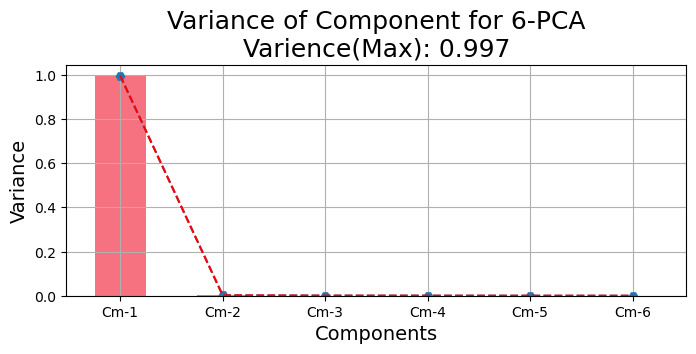

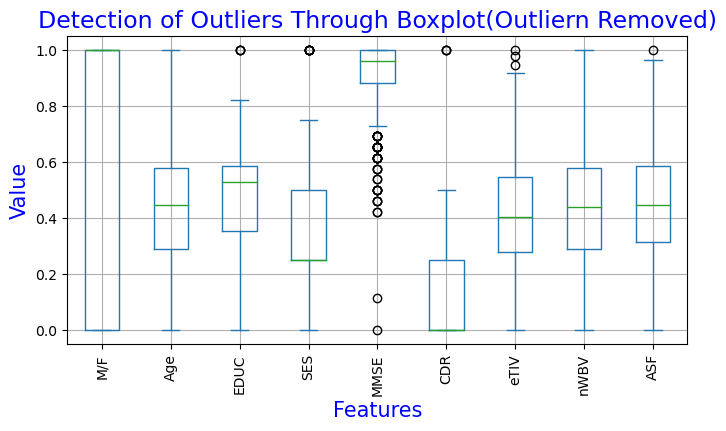

[0.50967065 0.18673237]


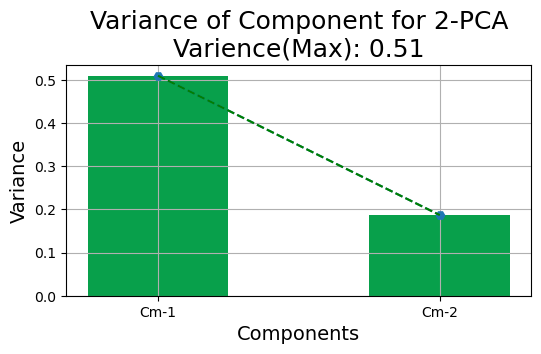

[0.50967065 0.18673237 0.11861587 0.08301578]


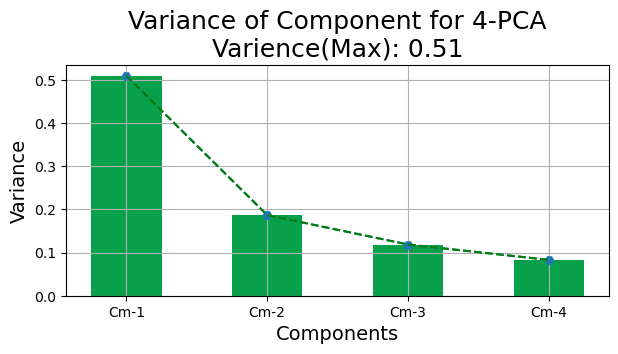

[0.50967065 0.18673237 0.11861587 0.08301578 0.04128942 0.02514796]


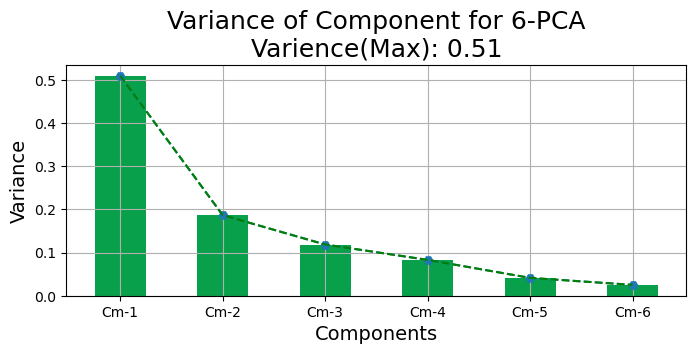

,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
0,0.0,0.710526,0.470588,0.250000,0.884615,0.00,0.981069,0.269430,0.009845,Nondemented
1,0.0,0.736842,0.470588,0.250000,1.000000,0.00,1.000000,0.191710,0.000000,Nondemented
2,0.0,0.394737,0.352941,0.365113,0.730769,0.25,0.636971,0.476684,0.239100,Demented
3,0.0,0.421053,0.352941,0.365113,0.923077,0.25,0.703786,0.357513,0.188467,Demented
4,0.0,0.526316,0.352941,0.365113,0.692308,0.25,0.659243,0.295337,0.222222,Demented
5,1.0,0.736842,0.705882,0.500000,0.923077,0.00,0.121381,0.341969,0.798875,Nondemented
6,1.0,0.789474,0.705882,0.500000,0.884615,0.00,0.104677,0.383420,0.824191,Nondemented
7,0.0,0.526316,0.352941,0.750000,0.923077,0.00,0.649220,0.352332,0.229255,Nondemented
8,0.0,0.605263,0.352941,0.750000,0.961538,0.25,0.662584,0.347150,0.219409,Nondemented
9,0.0,0.657895,0.352941,0.750000,1.000000,0.00,0.660356,0.316062,0.220816,Nondemented


In [14]:
AlzOutliers=[]
AlzOutliers.append(AlzheimerOD(ALZM_FEC.drop('Group',axis=1),2,6,3,"#F67280","r"))
AlzOutliers.append(AlzheimerOD(ALZM_FEC.drop('Group',axis=1),4,7,3,"#F67280","r"))
AlzOutliers.append(AlzheimerOD(ALZM_FEC.drop('Group',axis=1),6,8,3,"#F67280","r"))

alz_out_indic=[]
alz_out_flag=[]
for alo in AlzOutliers:
    for al in alo:
        if al>0.6:
            alz_out_indic.append("Outlier in Component-{} with Variance Value {}".format(alo.tolist().index(al)+1,round(al,5)))
            alz_out_flag.append(True)
if len(alz_out_flag)==3 and True in alz_out_flag:
    ALZ_OR=AlzheimerNorm(ALZM_FEC.drop('Group',axis=1))
ALZ_OR=pd.DataFrame(ALZ_OR,columns=ALZM_FEC.drop('Group',axis=1).columns.tolist())
BoxForAlzheimer(ALZ_OR, "Outliern Removed")
AlzheimerOD(ALZ_OR,2,6,3,"#08A04B","g")
AlzheimerOD(ALZ_OR,4,7,3,"#08A04B","g")
AlzheimerOD(ALZ_OR,6,8,3,"#08A04B","g")
ALZ_OR['Group']=ALZM_FEC['Group'].tolist()
ALZ_OR.head(10)

## Feature Selection Process

In [15]:
def AlzheimerSelectFeatures(alz):
    alz_X=alz.drop(['Group'],axis=1)
    alz_Y=alz['Group']
    
    kb=feature_selection.SelectKBest(feature_selection.chi2, k=6)
    kb.fit(alz_X, alz_Y)
    alzfets=alz_X.columns[kb.get_support()]
    print("Selected Features: \n",*alzfets,sep="\n")
    return alzfets

In [16]:
ALZM_Fets=AlzheimerSelectFeatures(ALZ_OR)

Selected Features: 

M/F
EDUC
SES
MMSE
CDR
nWBV


## Heart Disease Prediction

In [17]:
def DataPart(Pr, Tr):
    X_TR, X_TS, Y_TR, Y_TS=model_selection.train_test_split(Pr, Tr, test_size=0.25, random_state=42)
    return X_TR, X_TS, Y_TR, Y_TS

In [18]:
clscnt=ALZ_OR['Group'].value_counts().tolist()
print(ALZ_OR['Group'].value_counts())
clses=ALZ_OR['Group'].value_counts().index.tolist()
alzdfs=[]
for acl in clses:
    alzdfs.append(ALZ_OR[ALZ_OR['Group']==acl])
n_alzdfs=[]
for adf in range(len(alzdfs)):
    if adf==0:
        n_alzdfs.append(alzdfs[adf])
    else:
        df=utils.resample(alzdfs[adf], replace = True, n_samples = int(len(alzdfs[adf])*(clscnt[0]/len(alzdfs[adf]))), random_state = 0)
        df=df.reset_index(drop=True)
        n_alzdfs.append(df)
ALZ_OR_1=pd.concat(n_alzdfs).reset_index(drop=True)
ALZ_OR_1['Group'].value_counts()

Group
Nondemented    190
Demented       146
Converted       37
Name: count, dtype: int64


Group
Nondemented    190
Demented       190
Converted      190
Name: count, dtype: int64

In [19]:

alz_prd=ALZ_OR_1[ALZM_Fets]
alz_tr=ALZ_OR_1['Group']
ALZ_X_Tr,ALZ_X_Ts, ALZ_y_Tr, ALZ_y_Ts=DataPart(alz_prd, alz_tr)
print("Test Support\n",ALZ_y_Ts.value_counts())

Test Support
 Group
Nondemented    56
Converted      46
Demented       41
Name: count, dtype: int64


_____________________________________________________________________________
                            Naive Bayes 
_____________________________________________________________________________


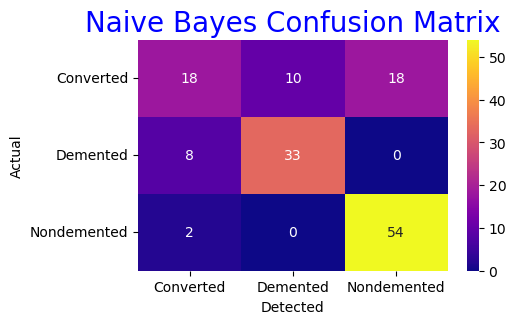


Test Accuracy: 73.43%


Train Accuracy: 72.37%


Classification Report for Naive Bayes 

              precision    recall  f1-score   support

   Converted       0.64      0.39      0.49        46
    Demented       0.77      0.80      0.79        41
 Nondemented       0.75      0.96      0.84        56

    accuracy                           0.73       143
   macro avg       0.72      0.72      0.71       143
weighted avg       0.72      0.73      0.71       143

_____________________________________________________________________________
                            Decision Tree 
_____________________________________________________________________________


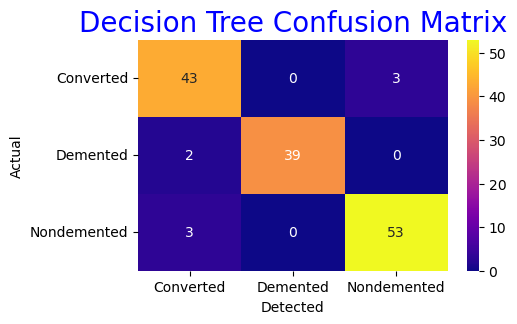


Test Accuracy: 94.41%


Train Accuracy: 100.0%


Classification Report for Decision Tree 

              precision    recall  f1-score   support

   Converted       0.90      0.93      0.91        46
    Demented       1.00      0.95      0.97        41
 Nondemented       0.95      0.95      0.95        56

    accuracy                           0.94       143
   macro avg       0.95      0.94      0.95       143
weighted avg       0.95      0.94      0.94       143

_____________________________________________________________________________
                            SVC 
_____________________________________________________________________________


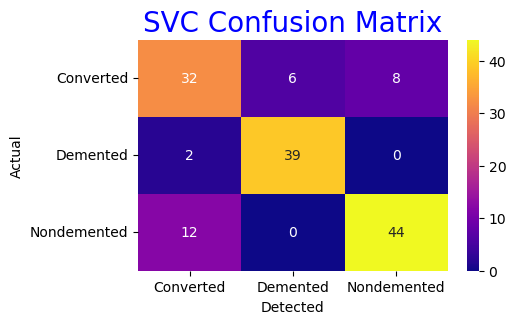


Test Accuracy: 80.42%


Train Accuracy: 86.42%


Classification Report for SVC 

              precision    recall  f1-score   support

   Converted       0.70      0.70      0.70        46
    Demented       0.87      0.95      0.91        41
 Nondemented       0.85      0.79      0.81        56

    accuracy                           0.80       143
   macro avg       0.80      0.81      0.81       143
weighted avg       0.80      0.80      0.80       143

_____________________________________________________________________________
                            K-Neighbors 
_____________________________________________________________________________


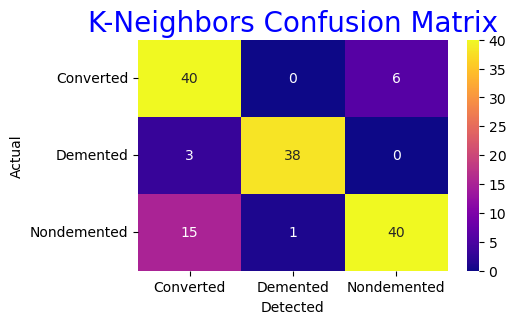


Test Accuracy: 82.52%


Train Accuracy: 91.33%


Classification Report for K-Neighbors 

              precision    recall  f1-score   support

   Converted       0.69      0.87      0.77        46
    Demented       0.97      0.93      0.95        41
 Nondemented       0.87      0.71      0.78        56

    accuracy                           0.83       143
   macro avg       0.84      0.84      0.83       143
weighted avg       0.84      0.83      0.83       143

_____________________________________________________________________________
                            Logistic 
_____________________________________________________________________________


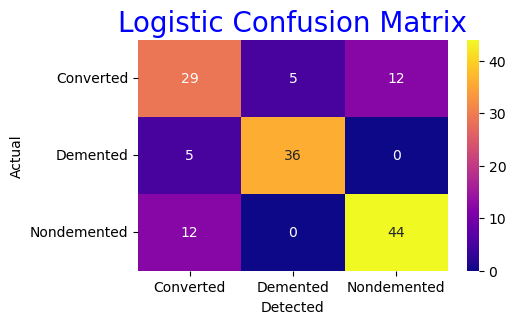


Test Accuracy: 76.22%


Train Accuracy: 80.33%


Classification Report for Logistic 

              precision    recall  f1-score   support

   Converted       0.63      0.63      0.63        46
    Demented       0.88      0.88      0.88        41
 Nondemented       0.79      0.79      0.79        56

    accuracy                           0.76       143
   macro avg       0.76      0.76      0.76       143
weighted avg       0.76      0.76      0.76       143

_____________________________________________________________________________


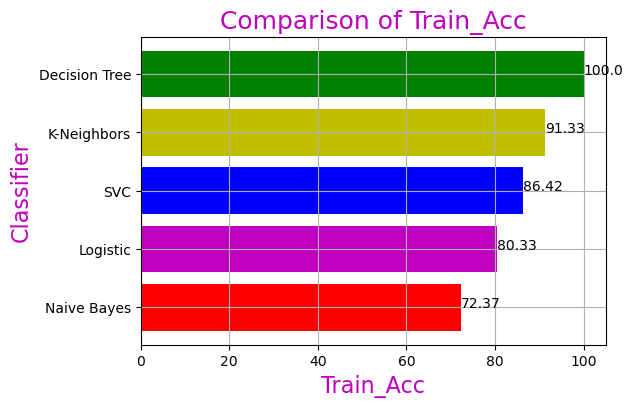

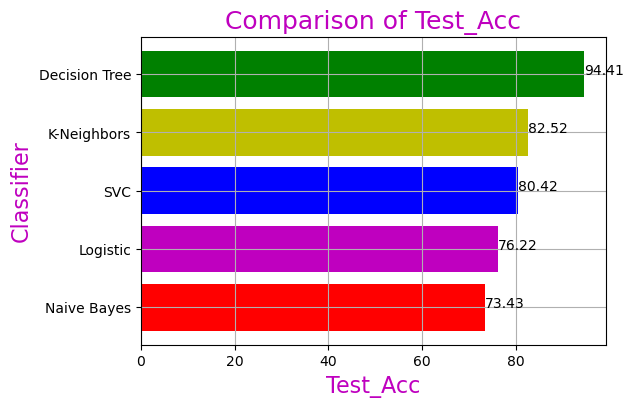

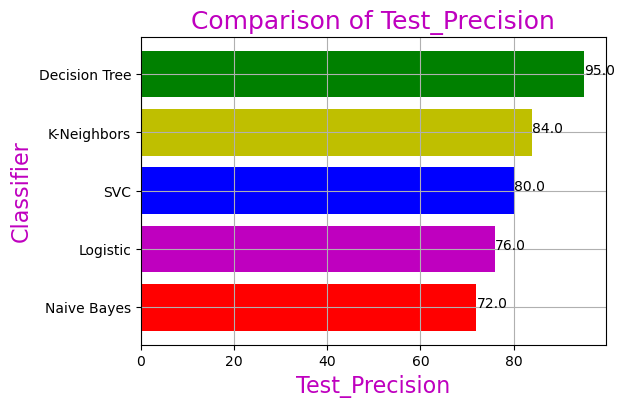

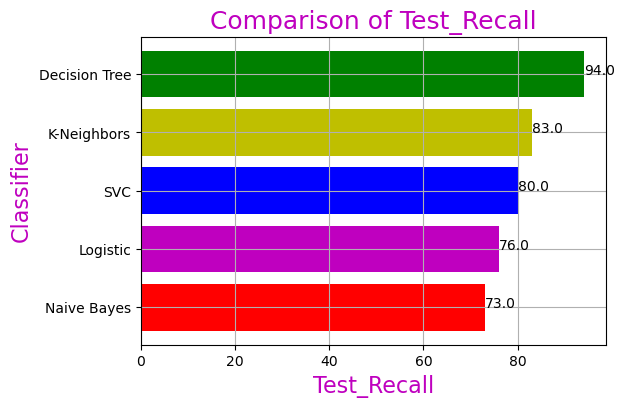

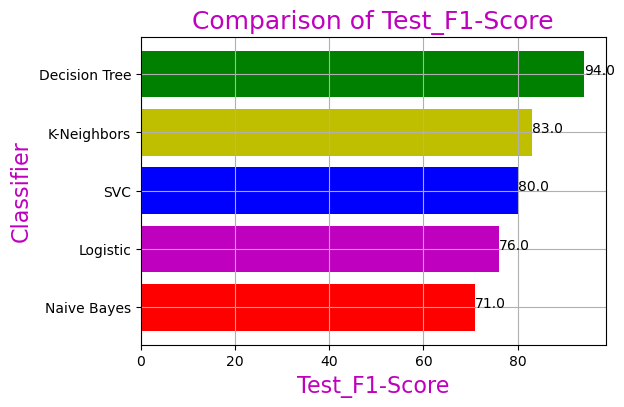

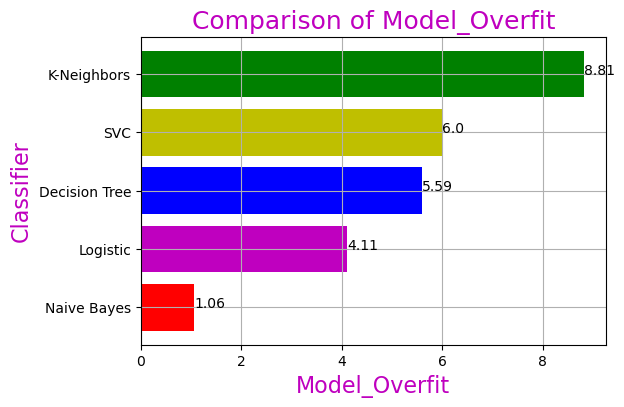

,Classifier,Train_Acc,Test_Acc,Test_Precision,Test_Recall,Test_F1-Score,Model_Overfit
1,Decision Tree,100.00,94.41,95.0,94.0,94.0,5.59
3,K-Neighbors,91.33,82.52,84.0,83.0,83.0,8.81
2,SVC,86.42,80.42,80.0,80.0,80.0,6.00
4,Logistic,80.33,76.22,76.0,76.0,76.0,4.11
0,Naive Bayes,72.37,73.43,72.0,73.0,71.0,1.06


In [20]:
ALZMODELS=[
    naive_bayes.GaussianNB(),
    tree.DecisionTreeClassifier(),
    pipeline.make_pipeline(preprocessing.StandardScaler(),svm.SVC()),
    neighbors.KNeighborsClassifier(),
    linear_model.LogisticRegression()
]
ALZ_MODEL_IND=[
    "Naive Bayes",
    "Decision Tree",
    "SVC",
    "K-Neighbors",
    "Logistic"
]


Res_Alz_Clf=[[],[],[],[],[],[]]
Mdl_Alz_Bk=[]
print("_____________________________________________________________________________")
for i in range(len(ALZMODELS)):
    print("                            {} ".format(ALZ_MODEL_IND[i]))
    print("_____________________________________________________________________________")
    Itr_Alz_mt=[[],[],[],[],[],[]]
    for ts in range(10):
        ALZMODELS[i].fit(ALZ_X_Tr,ALZ_y_Tr)
        Alz_Predict_Tst=ALZMODELS[i].predict(ALZ_X_Ts)
        Alz_Predict_TrN=ALZMODELS[i].predict(ALZ_X_Tr)
        Itr_Alz_mt[0].append(round(metrics.accuracy_score(ALZ_y_Ts,Alz_Predict_Tst)*100,2))
        
        Pred_Metrics=metrics.precision_recall_fscore_support(ALZ_y_Ts,Alz_Predict_Tst, average='weighted')[:-1]
        Itr_Alz_mt[1].append(round(Pred_Metrics[0],2)*100)
        Itr_Alz_mt[2].append(round(Pred_Metrics[1],2)*100)
        Itr_Alz_mt[3].append(round(Pred_Metrics[2],2)*100)
        cmt=pd.crosstab(ALZ_y_Ts, Alz_Predict_Tst, rownames=['Actual'], colnames=['Detected'], margins=True)
        Itr_Alz_mt[4].append(cmt.iloc[:3,:3])
        Itr_Alz_mt[5].append(metrics.classification_report(ALZ_y_Ts, Alz_Predict_Tst))
    Mdl_Alz_Bk.append(Itr_Alz_mt[0])
    sl_mx=Itr_Alz_mt[0].index(max(Itr_Alz_mt[0]))
    Res_Alz_Clf[0].append(round(metrics.accuracy_score(ALZ_y_Tr,Alz_Predict_TrN)*100,2))
    Res_Alz_Clf[1].append(Itr_Alz_mt[0][sl_mx])
    Res_Alz_Clf[2].append(Itr_Alz_mt[1][sl_mx])
    Res_Alz_Clf[3].append(Itr_Alz_mt[2][sl_mx])
    Res_Alz_Clf[4].append(Itr_Alz_mt[3][sl_mx])
    ov_fit_mdl=round(abs(round(metrics.accuracy_score(ALZ_y_Tr,Alz_Predict_TrN)*100,2)-Itr_Alz_mt[0][sl_mx]),2)
    Res_Alz_Clf[5].append(ov_fit_mdl)
    grpvisl.figure(figsize=(5,3))
    grpvisl.title("{} Confusion Matrix".format(ALZ_MODEL_IND[i]), fontsize=20,color="b")
    grpvz.heatmap(Itr_Alz_mt[4][sl_mx],fmt="d",annot=True,cmap="plasma")
    grpvisl.show()
    print("\nTest Accuracy: {}%\n".format(Itr_Alz_mt[0][sl_mx]))
    print("\nTrain Accuracy: {}%\n".format(round(metrics.accuracy_score(ALZ_y_Tr,Alz_Predict_TrN)*100,2)))
    print("\nClassification Report for {} \n\n{}".format(ALZ_MODEL_IND[i],Itr_Alz_mt[5][sl_mx]))
    print("_____________________________________________________________________________")

Alz_Clf_Df=pd.DataFrame({
    "Classifier":ALZ_MODEL_IND,
    "Train_Acc":Res_Alz_Clf[0],
    "Test_Acc":Res_Alz_Clf[1],
    "Test_Precision":Res_Alz_Clf[2],
    "Test_Recall":Res_Alz_Clf[3],
    "Test_F1-Score":Res_Alz_Clf[4],
    "Model_Overfit":Res_Alz_Clf[5]
})
barcolours=["r","m","b","y","g"]
for ar in Alz_Clf_Df.columns.tolist()[1:]:
    pdf=Alz_Clf_Df.sort_values(by=ar,ascending=True)
    grpvisl.figure(figsize=(6,4))
    grpvisl.title("Comparison of {}".format(ar),fontsize=18,color="m")
    grpvisl.barh(pdf['Classifier'],pdf[ar],color=barcolours)
    grpvisl.ylabel("Classifier",fontsize=16,color="m")
    grpvisl.xlabel("{}".format(ar),fontsize=16,color="m")
    for HIX, HVL in enumerate(pdf["{}".format(ar)]):
        grpvisl.text(HVL, HIX, str(HVL))
    grpvisl.grid()
    grpvisl.show()
Alz_Clf_Df=Alz_Clf_Df.sort_values(by='Test_Acc',ascending=False)
Alz_Clf_Df.to_csv("Alzheimer_Result.csv")
Alz_Clf_Df